<a href="https://colab.research.google.com/github/aekanun2020/Data-Analytics-using-Python/blob/main/from_Solution_Homework_to_Regression_withSCALER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! wget https://storage.googleapis.com/1sep/2008.csv

--2023-10-22 10:46:55--  https://storage.googleapis.com/1sep/2008.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [text/csv]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M  53.2MB/s    in 12s     

2023-10-22 10:47:08 (53.4 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [4]:
! wc -l 2008.csv

7009729 2008.csv


In [5]:
f = "2008.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines / 100)
import random
skip_idx = random.sample(range(1, num_lines), num_lines - size)
raw_pd = pd.read_csv(f, skiprows=skip_idx)

In [6]:
#raw_pd = pd.read_csv("2008.csv")

In [7]:
raw_pd.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,905.0,850,1334.0,1330,WN,3222,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,749.0,740,1227.0,1235,WN,3244,...,3.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,935.0,925,1106.0,1055,WN,1258,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1330.0,1320,1609.0,1615,WN,330,...,3.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,922.0,855,1102.0,1000,WN,574,...,4.0,52.0,0,NaN,0,13.0,0.0,35.0,0.0,14.0


In [8]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70096 entries, 0 to 70095
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70096 non-null  int64  
 1   Month              70096 non-null  int64  
 2   DayofMonth         70096 non-null  int64  
 3   DayOfWeek          70096 non-null  int64  
 4   DepTime            68732 non-null  float64
 5   CRSDepTime         70096 non-null  int64  
 6   ArrTime            68574 non-null  float64
 7   CRSArrTime         70096 non-null  int64  
 8   UniqueCarrier      70096 non-null  object 
 9   FlightNum          70096 non-null  int64  
 10  TailNum            69271 non-null  object 
 11  ActualElapsedTime  68540 non-null  float64
 12  CRSElapsedTime     70091 non-null  float64
 13  AirTime            68540 non-null  float64
 14  ArrDelay           68540 non-null  float64
 15  DepDelay           68732 non-null  float64
 16  Origin             700

In [9]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,70096.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.00,2008.0
Month,70096.0,6.392990,3.410794,1.0,3.0,6.0,9.00,12.0
DayofMonth,70096.0,15.771385,8.795168,1.0,8.0,16.0,23.00,31.0
DayOfWeek,70096.0,3.917470,1.985745,1.0,2.0,4.0,6.00,7.0
DepTime,68732.0,1333.726779,478.493276,1.0,928.0,1325.0,1728.00,2400.0
CRSDepTime,70096.0,1325.810859,464.852269,1.0,925.0,1317.0,1715.00,2359.0
ArrTime,68574.0,1482.153425,505.075167,1.0,1108.0,1512.0,1910.00,2400.0
CRSArrTime,70096.0,1494.729228,482.854387,1.0,1115.0,1515.0,1909.00,2400.0
FlightNum,70096.0,2220.761584,1961.067265,1.0,621.0,1572.0,3502.25,9741.0
ActualElapsedTime,68540.0,126.972279,69.916577,17.0,76.0,109.0,157.00,648.0


In [10]:
## เตรียมข้อมูลสำหรับการวิเคราะห์หา C.V.

describe_pd = pd.DataFrame(raw_pd.describe().transpose())

describe_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Year to LateAircraftDelay
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   24 non-null     float64
 1   mean    24 non-null     float64
 2   std     24 non-null     float64
 3   min     24 non-null     float64
 4   25%     24 non-null     float64
 5   50%     24 non-null     float64
 6   75%     24 non-null     float64
 7   max     24 non-null     float64
dtypes: float64(8)
memory usage: 2.2+ KB


In [11]:
## ดู Dispersion จาก C.V.

#describe_pd['std'].apply(lambda x: x/100)
describe_pd.assign(cv=lambda x: ((100/x['mean'])*x['std']))[['mean','std','cv']]
#df.assign(Discount_Percent=lambda x: (100/x.Fee)*x.Discount)

,mean,std,cv
Year,2008.000000,0.000000,0.000000
Month,6.392990,3.410794,53.352098
DayofMonth,15.771385,8.795168,55.766619
DayOfWeek,3.917470,1.985745,50.689484
DepTime,1333.726779,478.493276,35.876409
CRSDepTime,1325.810859,464.852269,35.061733
ArrTime,1482.153425,505.075167,34.077118
CRSArrTime,1494.729228,482.854387,32.303803
FlightNum,2220.761584,1961.067265,88.306069
ActualElapsedTime,126.972279,69.916577,55.064442


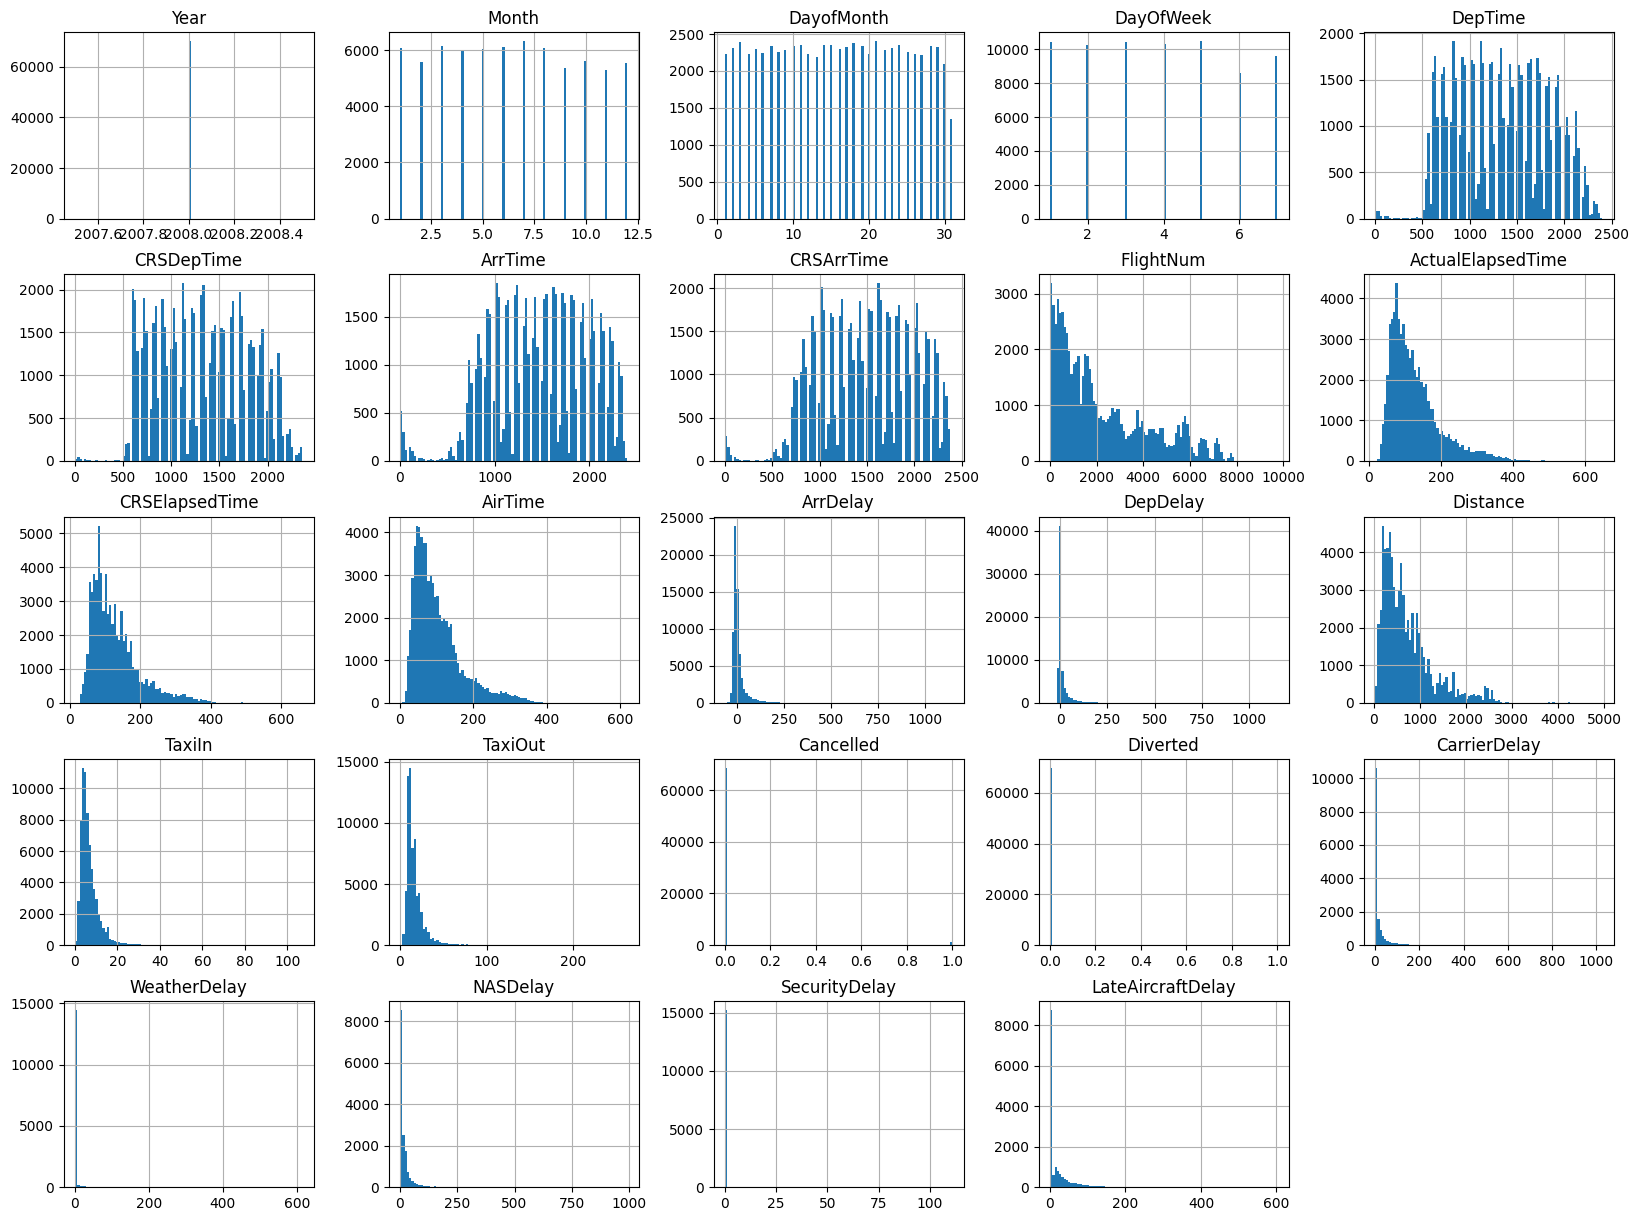

In [12]:
## ดู Distribution ของแต่ละ column

raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

In [13]:
categorical = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
Numerical columns are: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


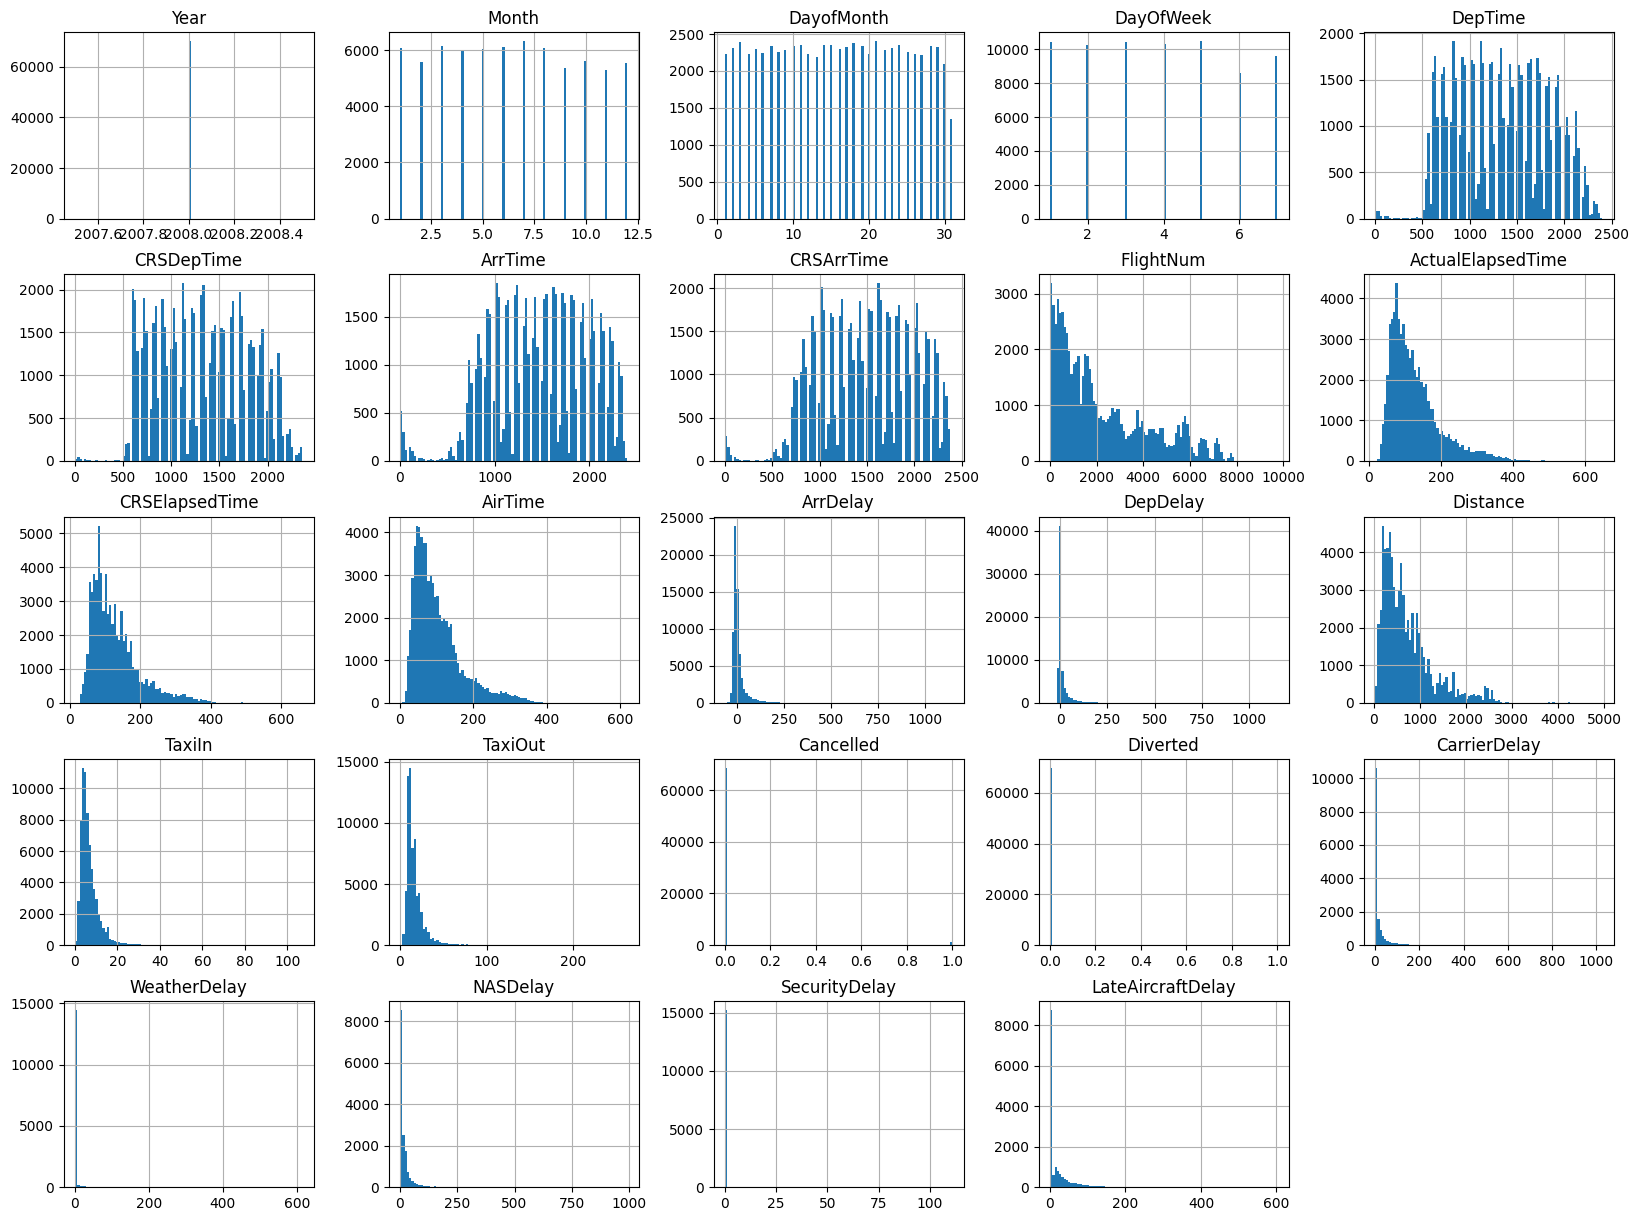

In [14]:
raw_pd[numerical].hist(bins=100, figsize=(20,15))
plt.show()

In [15]:
raw_pd['AirTime'].describe()

count    68540.000000
mean       103.680070
std         67.104047
min          1.000000
25%         55.000000
50%         85.000000
75%        132.000000
max        619.000000
Name: AirTime, dtype: float64

<Axes: xlabel='AirTime'>

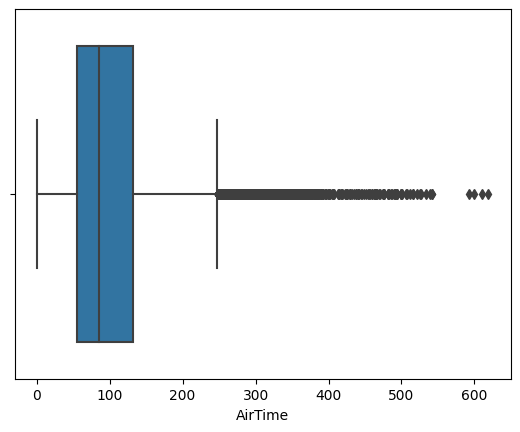

In [16]:
sns.boxplot(x=raw_pd['AirTime'])

In [17]:
raw_pd['ActualElapsedTime'].describe()

count    68540.000000
mean       126.972279
std         69.916577
min         17.000000
25%         76.000000
50%        109.000000
75%        157.000000
max        648.000000
Name: ActualElapsedTime, dtype: float64

<Axes: xlabel='ActualElapsedTime'>

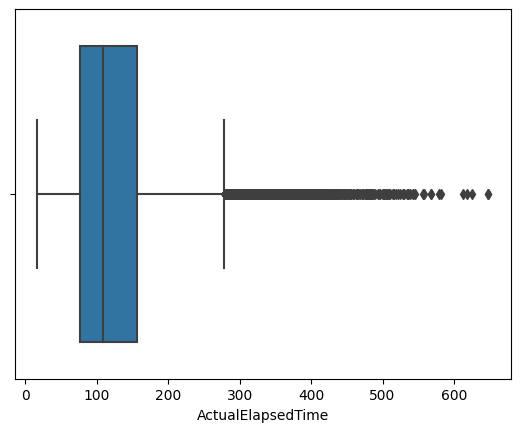

In [18]:
sns.boxplot(x=raw_pd['ActualElapsedTime'])

In [19]:
raw_pd['Cancelled'].describe()

count    70096.000000
mean         0.019602
std          0.138628
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Cancelled, dtype: float64

In [20]:
raw_pd.groupby(by='Cancelled')['Cancelled'].count()

Cancelled
0    68722
1     1374
Name: Cancelled, dtype: int64

In [21]:
raw_pd['Diverted'].describe()

## สังเกตค่า max, min แล้วคือ [0,1] ซึ่งเป็น Discrete ไม่ใช่ continuous
## จึงไม่เหมาะกับการวิเคราะห์ด้วย boxplot

count    70096.000000
mean         0.002596
std          0.050889
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Diverted, dtype: float64

In [22]:
## sns.boxplot(x=raw_pd['Diverted'])

In [23]:
raw_pd.groupby(by='Diverted')['Diverted'].count()

Diverted
0    69914
1      182
Name: Diverted, dtype: int64

In [24]:
analysisCol_list = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [25]:
raw_pd[analysisCol_list[0]].describe()

count    15299.000000
mean        15.446304
std         38.431719
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max       1026.000000
Name: CarrierDelay, dtype: float64

<Axes: xlabel='CarrierDelay'>

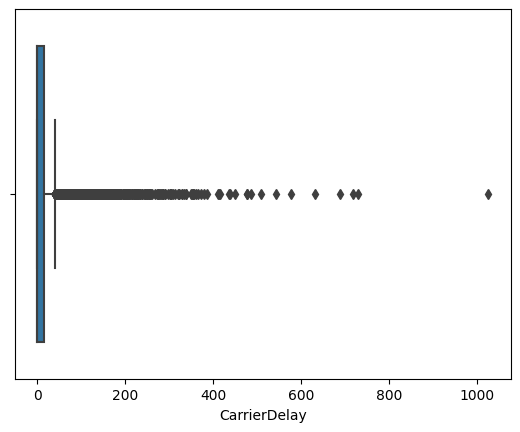

In [26]:
sns.boxplot(x=raw_pd[analysisCol_list[0]])

In [27]:
raw_pd[analysisCol_list[1]].describe()

count    15299.000000
mean         2.853128
std         18.965111
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        615.000000
Name: WeatherDelay, dtype: float64

<Axes: xlabel='WeatherDelay'>

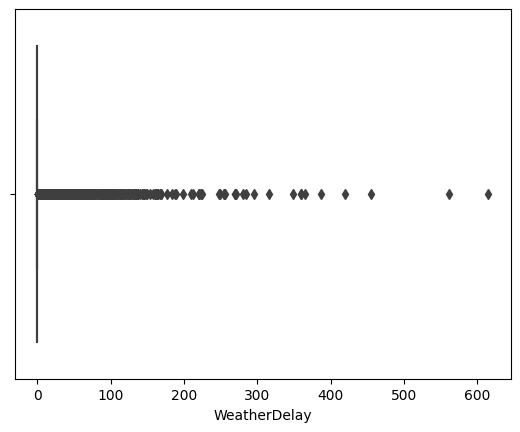

In [28]:
sns.boxplot(x=raw_pd[analysisCol_list[1]])

In [29]:
raw_pd[analysisCol_list[2]].describe()

count    15299.000000
mean        17.360481
std         33.049635
min          0.000000
25%          0.000000
50%          6.000000
75%         21.000000
max        992.000000
Name: NASDelay, dtype: float64

<Axes: xlabel='NASDelay'>

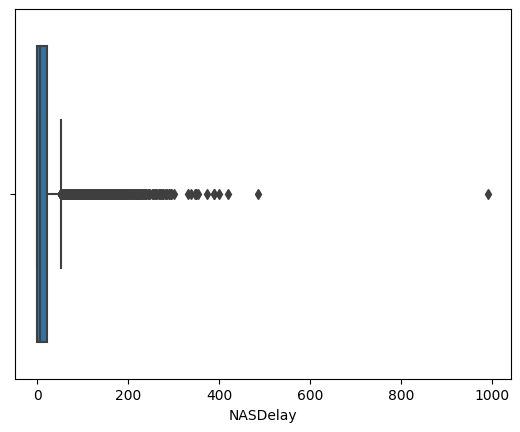

In [30]:
sns.boxplot(x=raw_pd[analysisCol_list[2]])

In [31]:
raw_pd[analysisCol_list[3]].describe()

count    15299.000000
mean         0.057259
std          1.439771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        111.000000
Name: SecurityDelay, dtype: float64

<Axes: xlabel='SecurityDelay'>

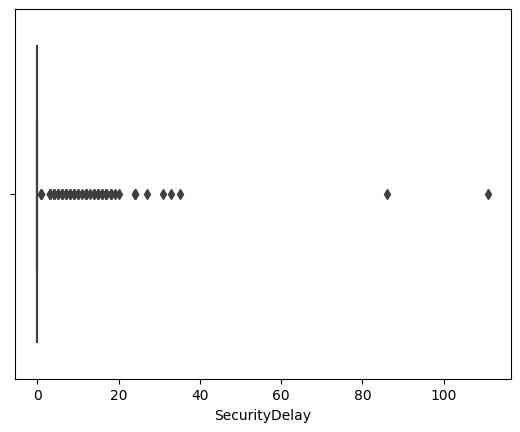

In [32]:
sns.boxplot(x=raw_pd[analysisCol_list[3]])

In [33]:
raw_pd[analysisCol_list[4]].describe()

count    15299.000000
mean        21.347343
std         39.814205
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max        602.000000
Name: LateAircraftDelay, dtype: float64

<Axes: xlabel='LateAircraftDelay'>

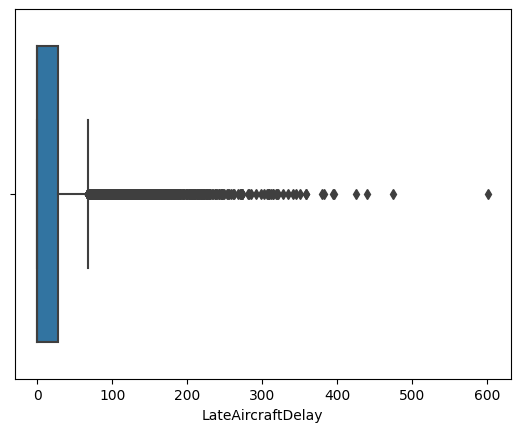

In [34]:
sns.boxplot(x=raw_pd[analysisCol_list[4]])

In [35]:
raw_pd['ArrDelay'].describe()

count    68540.000000
mean         8.262416
std         38.586243
min        -62.000000
25%        -10.000000
50%         -2.000000
75%         12.000000
max       1142.000000
Name: ArrDelay, dtype: float64

<Axes: xlabel='ArrDelay'>

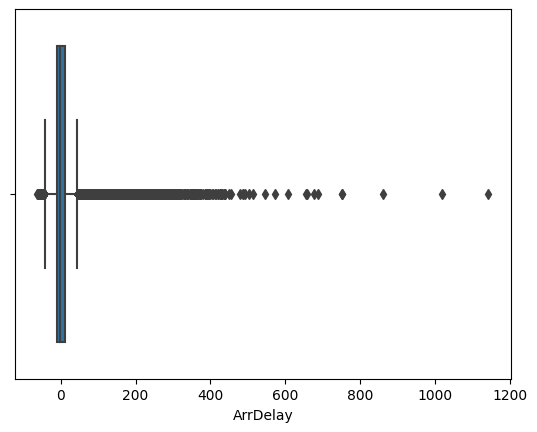

In [36]:
sns.boxplot(x=raw_pd['ArrDelay'])

In [37]:
raw_pd['DepDelay'].describe()

count    68732.000000
mean        10.068774
std         35.367950
min        -55.000000
25%         -4.000000
50%         -1.000000
75%          8.000000
max       1150.000000
Name: DepDelay, dtype: float64

<Axes: xlabel='DepDelay'>

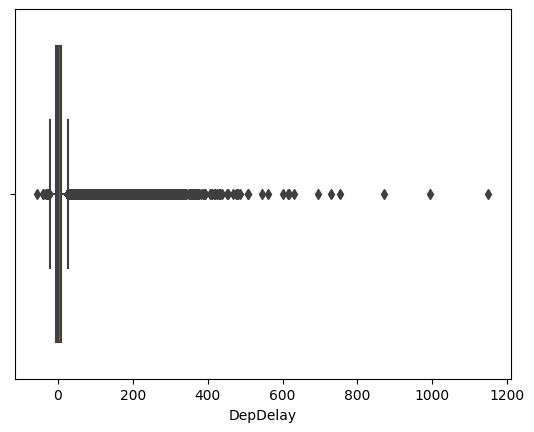

In [38]:
sns.boxplot(x=raw_pd['DepDelay'])

In [39]:
raw_pd['TaxiIn'].describe()

count    68574.000000
mean         6.856841
std          4.869603
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max        107.000000
Name: TaxiIn, dtype: float64

<Axes: xlabel='TaxiIn'>

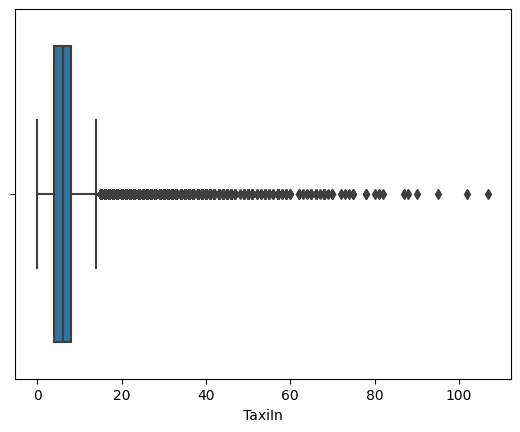

In [40]:
sns.boxplot(x=raw_pd['TaxiIn'])

In [41]:
raw_pd['TaxiOut'].describe()

count    68725.000000
mean        16.444380
std         11.345368
min          0.000000
25%         10.000000
50%         14.000000
75%         19.000000
max        262.000000
Name: TaxiOut, dtype: float64

<Axes: xlabel='TaxiOut'>

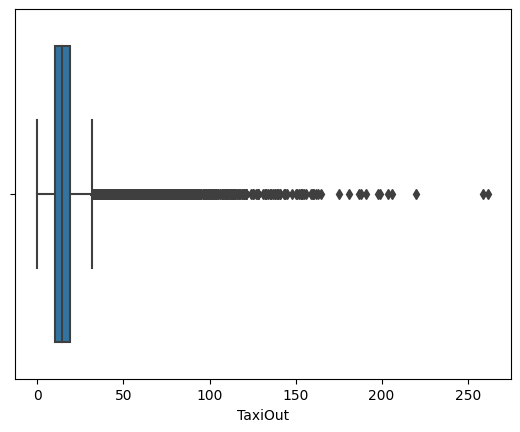

In [42]:
sns.boxplot(x=raw_pd['TaxiOut'])

In [43]:
raw_pd['Distance'].describe()

count    70096.000000
mean       723.376655
std        558.812528
min         31.000000
25%        324.000000
50%        576.000000
75%        952.000000
max       4962.000000
Name: Distance, dtype: float64

<Axes: xlabel='Distance'>

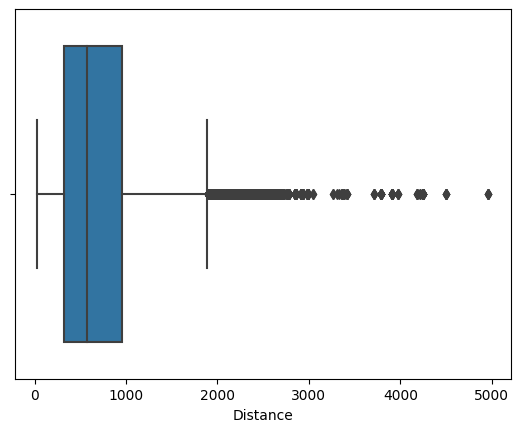

In [44]:
sns.boxplot(x=raw_pd['Distance'])

In [45]:
raw_pd['AirTime'].describe()

count    68540.000000
mean       103.680070
std         67.104047
min          1.000000
25%         55.000000
50%         85.000000
75%        132.000000
max        619.000000
Name: AirTime, dtype: float64

<Axes: xlabel='AirTime'>

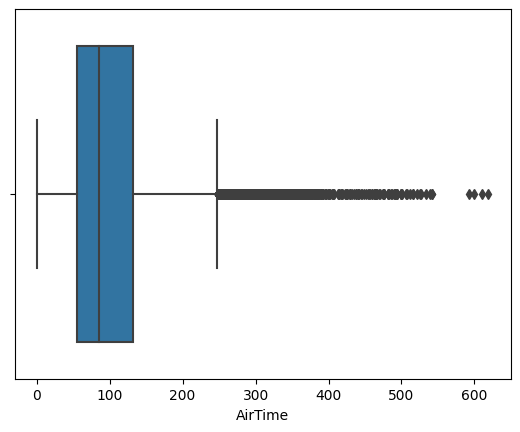

In [46]:
sns.boxplot(x=raw_pd['AirTime'])

In [47]:
## Multivariate Analysis - Correlation

<Axes: xlabel='ArrDelay', ylabel='LateAircraftDelay'>

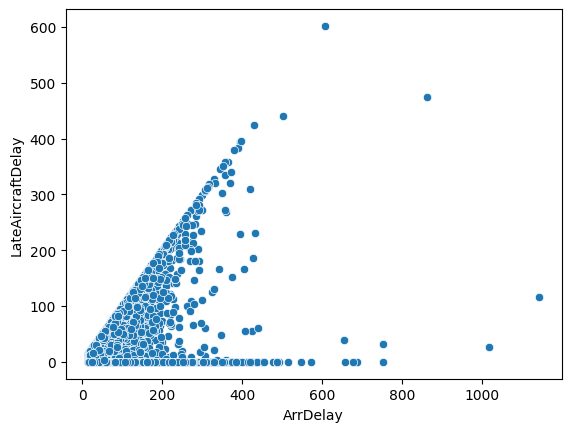

In [48]:
sns.scatterplot(data=raw_pd, x='ArrDelay',y='LateAircraftDelay')

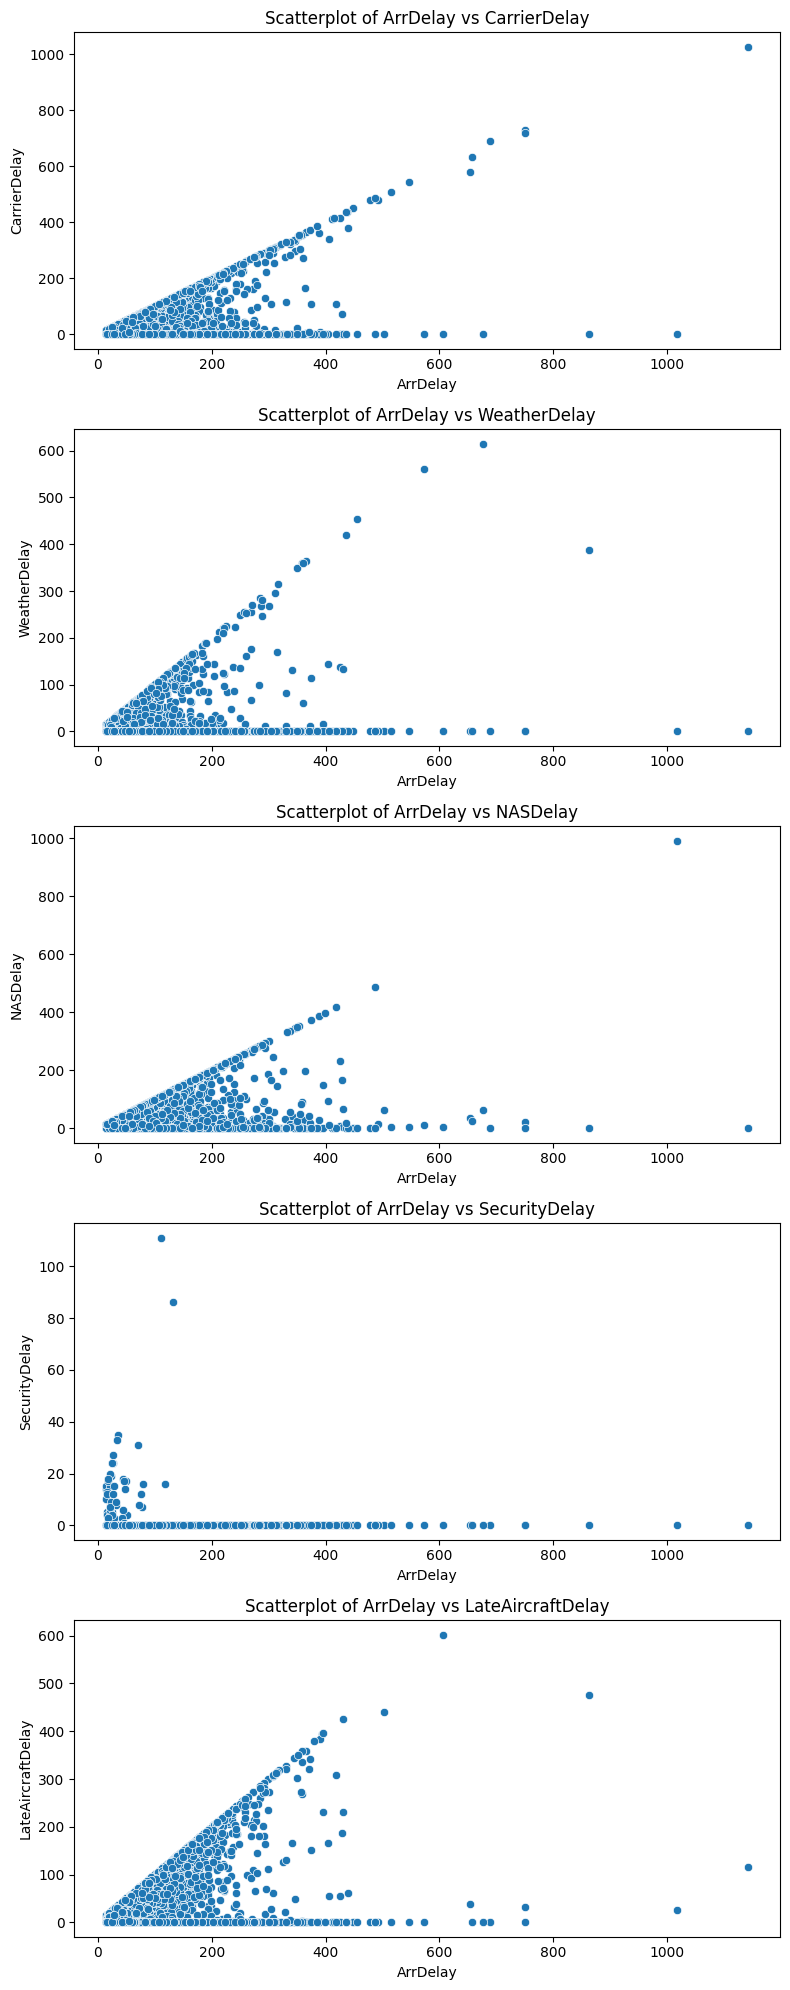

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# ตั้งค่าขนาดของแต่ละ figure
fig, axes = plt.subplots(nrows=len(analysisCol_list), figsize=(8, 4*len(analysisCol_list)))

for idx, col in enumerate(analysisCol_list):
    sns.scatterplot(data=raw_pd, x='ArrDelay', y=col, ax=axes[idx])
    axes[idx].set_title(f'Scatterplot of ArrDelay vs {col}')

plt.tight_layout()
plt.show()


In [50]:
## Feature Engineering, Model Training and Evaluation

In [51]:
def t_timeperiod(origin):
    if origin is None:
        period = None
    elif origin > 0 and origin < 600:
        period = '00.01-05.59'
    elif origin >= 600 and origin <=1200:
        period = '06.00-11.59'
    elif origin >= 1200 and origin <= 1800:
        period = '12.00-17.59'
    elif origin >= 1800 and origin <= 2400:
        period = '18.00-24.00'
    else:
        period = 'NA'
    return period

In [52]:
raw_pd['DepTime'] = raw_pd['DepTime'].apply(lambda x:t_timeperiod(x))

In [53]:
max_distance = raw_pd['Distance'].max()
min_distance = raw_pd['Distance'].min()

In [54]:
def t_normalized_distance(origin):
    if origin is None:
        return None
    else:
        return ((origin-min_distance)/(max_distance-min_distance))

In [55]:
raw_pd['Distance'] = raw_pd['Distance'].apply(lambda x:t_normalized_distance(x))

In [56]:
features_pd = raw_pd[['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay']]

In [57]:
final_pd = features_pd.dropna()

In [58]:
final_pd.count()

UniqueCarrier    68540
Origin           68540
Dest             68540
DepTime          68540
TaxiOut          68540
TaxiIn           68540
DepDelay         68540
DayOfWeek        68540
Distance         68540
ArrDelay         68540
dtype: int64

In [59]:
features_pd.head(20)

,UniqueCarrier,Origin,Dest,DepTime,TaxiOut,TaxiIn,DepDelay,DayOfWeek,Distance,ArrDelay
0,WN,LAS,AUS,06.00-11.59,10.0,4.0,15.0,4,0.214764,4.0
1,WN,LAS,HOU,06.00-11.59,9.0,3.0,9.0,4,0.244170,-8.0
2,WN,LAS,OAK,06.00-11.59,17.0,3.0,10.0,4,0.076252,11.0
3,WN,LAX,ELP,12.00-17.59,10.0,3.0,10.0,4,0.138511,-6.0
4,WN,LAX,LAS,06.00-11.59,52.0,4.0,27.0,4,0.041574,62.0
5,WN,LAX,OAK,18.00-24.00,9.0,4.0,46.0,4,0.062056,49.0
6,WN,LAX,PHX,06.00-11.59,8.0,4.0,0.0,4,0.068749,-10.0
7,WN,LAX,SJC,12.00-17.59,8.0,5.0,30.0,4,0.056175,27.0
8,WN,LAX,SLC,06.00-11.59,7.0,6.0,2.0,4,0.113364,-14.0
9,WN,LBB,DAL,06.00-11.59,9.0,3.0,-4.0,4,0.053133,-5.0


In [60]:


#raw_pd.isnull().sum()
#nullCol_series = raw_pd.isnull().sum()
#notNull_list = list(nullCol_series[nullCol_series == 0].index)
#notNull_list
#requiredCol_list = ['TaxiIn','TaxiOut','ArrDelay']
#selectedCol_list = notNull_list + requiredCol_list
#noNull_pd = raw_pd.loc[:,selectedCol_list].dropna()
#noNull_pd.isnull().sum()
#noNull_pd.describe()
#noNull_pd.info()

In [61]:
#final_pd = noNull_pd

In [62]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [63]:
train_df = final_pd.sample(frac=0.8,random_state=123)

In [64]:
test_df = final_pd.drop(train_df.index)

In [65]:
train_df.count()

UniqueCarrier    54832
Origin           54832
Dest             54832
DepTime          54832
TaxiOut          54832
TaxiIn           54832
DepDelay         54832
DayOfWeek        54832
Distance         54832
ArrDelay         54832
dtype: int64

In [66]:
test_df.count()

UniqueCarrier    13708
Origin           13708
Dest             13708
DepTime          13708
TaxiOut          13708
TaxiIn           13708
DepDelay         13708
DayOfWeek        13708
Distance         13708
ArrDelay         13708
dtype: int64

In [67]:
train_labels = train_df.filter(['ArrDelay'])
train_df = train_df.loc[:, train_df.columns != 'ArrDelay']

In [68]:
type(train_labels)

pandas.core.frame.DataFrame

In [69]:
test_labels = test_df.filter(['ArrDelay'])
test_df = test_df.loc[:, test_df.columns != 'ArrDelay']

In [70]:
X_train = train_df
X_test = test_df
y_train = train_labels
y_test = test_labels

In [71]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest', 'DepTime']
Numerical columns are: ['TaxiOut', 'TaxiIn', 'DepDelay', 'DayOfWeek', 'Distance']


In [72]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [73]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
              ('model', DecisionTreeRegressor(max_depth=None))])
pipeline_model = pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("\t R2 score:", r2_score(y_test, predictions))

	 RMSE: 13.40547291647653
	 R2 score: 0.8853516010818445
